### <span style="color:#336699">Análise Exploratória dos Dados</span>
<hr>

In [1]:
%matplotlib nbagg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import glob, os
from pandas.plotting import parallel_coordinates
import statistics

In [24]:
data = pd.read_csv('series_output_v2pivosmatopibaok.csv')
coordenadas = pd.read_csv('output_coordenadas_v2pivosmatopibaok.csv')
data = data/10000
desvio = []
amplitude = []

In [25]:
for i in range(len(data['2017-12-03'])):
    desvio.append(np.sqrt(data.loc[i].var()))
    amplitude.append(data.loc[i].max() - data.loc[i].min())

In [31]:
data['desvio'] = desvio
data['amplitude'] = amplitude

# data['lat'] = coordenadas['Lat']
# data['long'] = coordenadas['Long']

In [34]:
plt.plot(data['amplitude']);

<IPython.core.display.Javascript object>


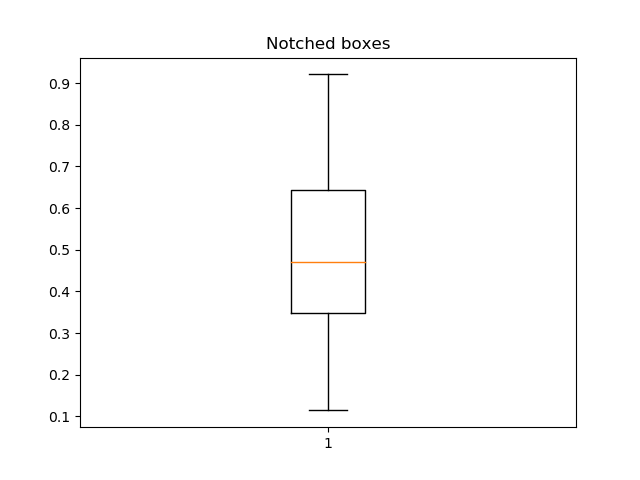

{'whiskers': [<matplotlib.lines.Line2D at 0x1a623523a58>,
 'caps': [<matplotlib.lines.Line2D at 0x1a62352f160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a623523908>],
 'medians': [<matplotlib.lines.Line2D at 0x1a62352f7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a62352fb38>],
 'means': []}

In [29]:
fig2, ax2 = plt.subplots()
ax2.set_title('Notched boxes')
ax2.boxplot(data['amplitude'])

<IPython.core.display.Javascript object>


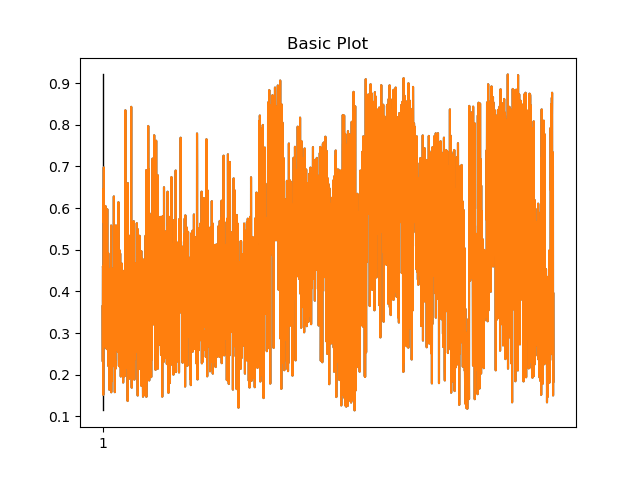

{'whiskers': [<matplotlib.lines.Line2D at 0x1a62323c470>,
 'caps': [<matplotlib.lines.Line2D at 0x1a62323cb38>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a62323c320>],
 'medians': [<matplotlib.lines.Line2D at 0x1a623248208>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a623248550>],
 'means': []}

In [28]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(data['amplitude'])

<IPython.core.display.Javascript object>


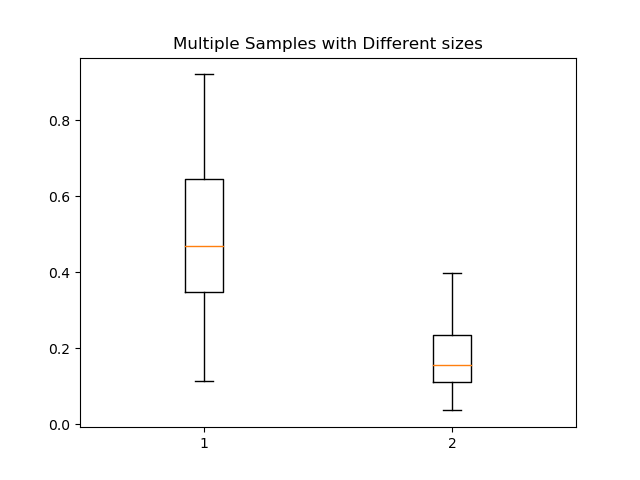

{'whiskers': [<matplotlib.lines.Line2D at 0x1a6238250f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a623825470>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a623808f60>,
 'medians': [<matplotlib.lines.Line2D at 0x1a623825c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a623825f60>,
 'means': []}

In [30]:
dados = [data['amplitude'], data['desvio']]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(dados)

In [6]:
len(data)

4534

In [7]:
data.head()

,2017-11-01,2017-11-17,2017-12-03,2017-12-19,2018-01-01,2018-01-17,2018-02-02,2018-02-18,2018-03-06,2018-03-22,desvio
0,0.4541,0.4598,0.4695,0.4671,0.4671,0.7197,0.6578,0.6247,0.8184,0.6125,0.130476
1,0.4071,0.5636,0.4103,0.5108,0.5108,0.5068,0.4105,0.5613,0.6551,0.5141,0.079421
2,0.3762,0.4450,0.4592,0.3525,0.3525,0.3738,0.4194,0.2864,0.5181,0.4257,0.065977
3,0.4179,0.4661,0.3736,0.2216,0.4239,0.4535,0.6341,0.6819,0.6476,0.6240,0.148042
4,0.4002,0.4378,0.3571,0.1954,0.4643,0.3941,0.4339,0.5442,0.6520,0.5774,0.127099


In [8]:
for i in range(len(data['2017-12-03'])):
    plt.plot(data.loc[i])

In [9]:
teste = data[data['desvio']>0.15 ]
len(teste['desvio'])

2114

In [10]:
teste = teste[teste['desvio']<0.30]
len(teste['desvio'])

1710

In [23]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(teste['amplitude'])

<IPython.core.display.Javascript object>

KeyError: 'amplitude'

In [12]:
data['desvio'].mean()

0.16545336629604857

In [13]:
for i in teste:
    print(i)
    plt.plot(i)

2017-11-01
2017-11-17
2017-12-03
2017-12-19
2018-01-01
2018-01-17
2018-02-02
2018-02-18
2018-03-06
2018-03-22
desvio


In [14]:
plt.plot(teste['desvio'])

In [15]:
f,ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(), annot = True, linewidths = .2, fmt = '.2f')
plt.show()

<IPython.core.display.Javascript object>

In [16]:
data.head()

,2017-11-01,2017-11-17,2017-12-03,2017-12-19,2018-01-01,2018-01-17,2018-02-02,2018-02-18,2018-03-06,2018-03-22,desvio
0,0.4541,0.4598,0.4695,0.4671,0.4671,0.7197,0.6578,0.6247,0.8184,0.6125,0.130476
1,0.4071,0.5636,0.4103,0.5108,0.5108,0.5068,0.4105,0.5613,0.6551,0.5141,0.079421
2,0.3762,0.4450,0.4592,0.3525,0.3525,0.3738,0.4194,0.2864,0.5181,0.4257,0.065977
3,0.4179,0.4661,0.3736,0.2216,0.4239,0.4535,0.6341,0.6819,0.6476,0.6240,0.148042
4,0.4002,0.4378,0.3571,0.1954,0.4643,0.3941,0.4339,0.5442,0.6520,0.5774,0.127099


In [17]:
data.columns

Index(['2017-11-01', '2017-11-17', '2017-12-03', '2017-12-19', '2018-01-01',
       '2018-01-17', '2018-02-02', '2018-02-18', '2018-03-06', '2018-03-22',
       'desvio'],
      dtype='object')

In [18]:
plt.plot(data)

In [19]:
g = sns.pairplot(data)

<IPython.core.display.Javascript object>

In [20]:
f,ax = plt.subplots(figsize = (20, 30))
parallel_coordinates(data,'2017-11-17', colormap=plt.get_cmap("Set2"))
plt.show()

<IPython.core.display.Javascript object>

In [21]:
newData = data
del newData['HALSTEAD_EFFORT']
del newData['HALSTEAD_PROG_TIME']
del newData['HALSTEAD_VOLUME']

KeyError: 'HALSTEAD_EFFORT'

In [ ]:
from sklearn import tree

In [ ]:
classes = data["Defective"]

In [ ]:
del data['Defective']

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, classes)

In [ ]:
tree.plot_tree(clf.fit(data, classes))

In [ ]:
import graphviz
import os

In [ ]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("Software Defective")

In [ ]:
data.columns

In [ ]:
graph =dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=np.array(data.columns),  
                      class_names=np.array(['OK', 'Defeito']),  
                      filled=True, rounded=True,  
                      special_characters=True)  
dot_data
graph = graphviz.Source(dot_data)  
graph.render("arvore")

### <span style="color:#336699">Referências</span>
<hr>
D. Gray, D. Bowes, N. Davey, Y. Sun and B. Christianson, "The misuse of the NASA metrics data program data sets for automated software defect prediction," 15th Annual Conference on Evaluation & Assessment in Software Engineering (EASE 2011), Durham, 2011, pp. 96-103.
doi: 10.1049/ic.2011.0012
keywords: {data mining;fault tolerant computing;NASA metrics data program data set;automated software defect prediction;data cleansing process},
URL: http://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6083167&isnumber=6083155